******************************************************************************

#### Building the model

##### Case Example - Predicting customer churn problem (File Name: Churn.csv)


Step 1 
- Scope the data & check the datatypes

Step 2
- Preprocess the data
- Creating new features to help improve model performance
- ML algo require features to be 'numeric' - endcoding categorical variables

Step 3
- Building baseline model
- Try different prediction models (Logistic Regression & SVM)

Step 4
- Evaluating Model Performance: Train & Test Sets
- Basic matric: Accuracy


Step 5 
- Model Metrics: Confusion Matrix / Precision & Recall / F1 Score
- ROC & AUC curve



********************************************************************************

In [180]:
import pandas as pd

# load dataset - telco.csv

telco = pd.read_csv("Churn.csv")

Step 1 
- Scope the data & check the datatypes

In [181]:
telco.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [182]:
telco.describe()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,437.182418
std,39.822106,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,42.371290
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,408.000000
25%,74.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,408.000000
50%,101.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,415.000000
75%,127.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,510.000000
max,243.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,510.000000


In [183]:
telco.dtypes

Account_Length      int64
Vmail_Message       int64
Day_Mins          float64
Eve_Mins          float64
Night_Mins        float64
Intl_Mins         float64
CustServ_Calls      int64
Churn              object
Intl_Plan          object
Vmail_Plan         object
Day_Calls           int64
Day_Charge        float64
Eve_Calls           int64
Eve_Charge        float64
Night_Calls         int64
Night_Charge      float64
Intl_Calls          int64
Intl_Charge       float64
State              object
Area_Code           int64
Phone              object
dtype: object

In [184]:
# Check 'Churners' & 'Non-Churners'

telco['Churn'].value_counts()

no     2850
yes     483
Name: Churn, dtype: int64

In [185]:
# alternative way: Using Groupby

telco.groupby('Churn')['Churn'].count()

Churn
no     2850
yes     483
Name: Churn, dtype: int64

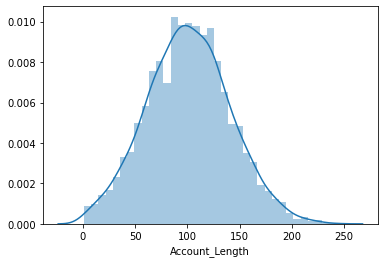

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(telco['Account_Length'])
plt.show()

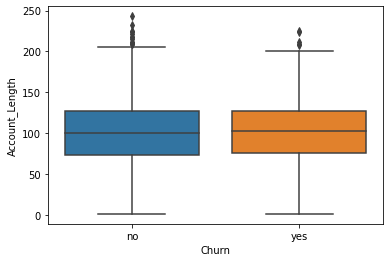

In [187]:
# Use boxplot to find outliers

sns.boxplot(x ='Churn', y ='Account_Length', data = telco) 
plt.show()

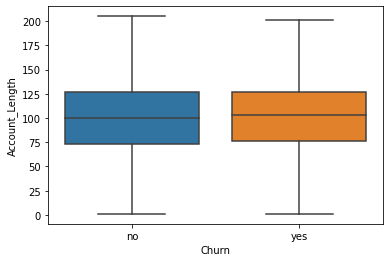

In [188]:
# Use 'sym=""'' to eliminate outliers

sns.boxplot(x ='Churn', y ='Account_Length', data = telco, sym="") 
plt.show()

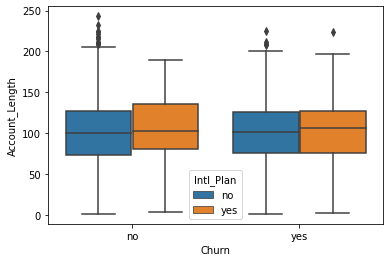

In [189]:
# Add 3rd variable - e.g. 'Intl_Plan'

sns.boxplot(x = 'Churn', y = 'Account_Length', data = telco, hue = 'Intl_Plan')
plt.show()

Step 2
- Preprocess the data
- Creating new features to help improve model performance
- ML algo require features to be 'numeric' - endcoding categorical variables

In [190]:
from sklearn.preprocessing import LabelEncoder


# # Replace 'no' with 0 and 'yes' with 1 in 'Intl_Plan'
telco['Intl_Plan'] = LabelEncoder().fit_transform(telco['Intl_Plan'])

# Replace 'no' with 0 and 'yes' with 1 in 'Vmail_Plan'
telco['Vmail_Plan'] = telco['Vmail_Plan'].replace({'no':0, 'yes':1})

# Replace 'no' with 0 and 'yes' with 1 in 'Churn'
telco['Churn'] = telco['Churn'].replace({'no':0, 'yes':1})

In [191]:
telco[['Intl_Plan', 'Vmail_Plan', 'Churn']]

,Intl_Plan,Vmail_Plan,Churn
0,0,1,0
1,0,1,0
2,0,0,0
3,1,0,0
4,1,0,0
...,...,...,...
3328,0,1,0
3329,0,0,0
3330,0,0,0
3331,1,0,0


In [192]:
# <IF> - you prefer to take 51 states into the model, use below code to concat the telco & telco state


# Perform one hot encoding on 'State'
# telco_state = pd.get_dummies(telco['State'])

# telco_1 = pd.concat((telco, telco_state), axis = 1)

In [193]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   int64  
 8   Intl_Plan       3333 non-null   int32  
 9   Vmail_Plan      3333 non-null   int64  
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

In [194]:
# Drop unnecessary features

telco = telco.drop(['Area_Code', 'Phone', 'State'], axis=1)

In [195]:
# <IF> - Re-scale the different scales of the 'Intl_Calls' and 'Night_Mins' using 'StandardScaler'

# Import StandardScaler
# from sklearn.preprocessing import StandardScaler

# Scale telco using StandardScaler
# telco_scaled = StandardScaler().fit_transform(telco)

# Add column names back for readability
#telco_scaled_df = pd.DataFrame(telco_scaled, columns=["Intl_Calls", "Night_Mins"])

# Print summary statistics
#print(telco_scaled_df.describe())

In [196]:
# Create the new feature

telco['Avg_Night_Calls'] = telco['Night_Mins'] / telco['Night_Calls']

telco['Day_Cost'] = telco['Day_Mins'] / telco['Day_Charge']

In [197]:
telco[telco['Day_Cost'].isnull()]

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Avg_Night_Calls,Day_Cost
1345,98,0,0.0,159.6,167.1,6.8,4,1,0,0,0,0.0,130,13.57,88,7.52,1,1.84,1.898864,NaN
1397,101,0,0.0,192.1,168.8,7.2,1,0,0,0,0,0.0,119,16.33,95,7.60,4,1.94,1.776842,NaN


In [198]:
telco.iloc[1397]

Account_Length     101.000000
Vmail_Message        0.000000
Day_Mins             0.000000
Eve_Mins           192.100000
Night_Mins         168.800000
Intl_Mins            7.200000
CustServ_Calls       1.000000
Churn                0.000000
Intl_Plan            0.000000
Vmail_Plan           0.000000
Day_Calls            0.000000
Day_Charge           0.000000
Eve_Calls          119.000000
Eve_Charge          16.330000
Night_Calls         95.000000
Night_Charge         7.600000
Intl_Calls           4.000000
Intl_Charge          1.940000
Avg_Night_Calls      1.776842
Day_Cost                  NaN
Name: 1397, dtype: float64

In [199]:
# fillna for '1345' & '1397'

telco[telco['Day_Cost'].isnull()] = telco[telco['Day_Cost'].isnull()].fillna(0)

In [200]:
telco['Day_Cost'].isnull().sum()

0

In [201]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Account_Length   3333 non-null   int64  
 1   Vmail_Message    3333 non-null   int64  
 2   Day_Mins         3333 non-null   float64
 3   Eve_Mins         3333 non-null   float64
 4   Night_Mins       3333 non-null   float64
 5   Intl_Mins        3333 non-null   float64
 6   CustServ_Calls   3333 non-null   int64  
 7   Churn            3333 non-null   int64  
 8   Intl_Plan        3333 non-null   int32  
 9   Vmail_Plan       3333 non-null   int64  
 10  Day_Calls        3333 non-null   int64  
 11  Day_Charge       3333 non-null   float64
 12  Eve_Calls        3333 non-null   int64  
 13  Eve_Charge       3333 non-null   float64
 14  Night_Calls      3333 non-null   int64  
 15  Night_Charge     3333 non-null   float64
 16  Intl_Calls       3333 non-null   int64  
 17  Intl_Charge   

Step 3
- Building baseline model
- Try different models

In [202]:
# Create a list of feature for easy referring

features = ['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins', 'Intl_Mins', 'CustServ_Calls', 'Intl_Plan', 'Vmail_Plan', 'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge',
       'Night_Calls', 'Night_Charge', 'Intl_Calls', 'Intl_Charge']


In [203]:
# Create a new customer profile for prediction

new_customer_dict = {'Account_Length': [91],
               'Vmail_Message': [23],
               'Day_Mins': [232.4],
               'Eve_Mins': [186.0],
               'Night_Mins': [190.5],
               'Intl_Mins': [12.3],
               'CustServ_Calls': [3],
               'Intl_Plan': [0],
               'Vmail_Plan': [1],
                'Day_Calls': [97],
               'Day_Charge': [39.51],
               'Eve_Calls': [88],
               'Eve_Charge': [15.81],
               'Night_Calls':[128],
               'Night_Charge': [8.57],
               'Intl_Calls': [3],
               'Intl_Charge': [3.32]}

new_customer = pd.DataFrame(new_customer_dict)

In [204]:
new_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  1 non-null      int64  
 1   Vmail_Message   1 non-null      int64  
 2   Day_Mins        1 non-null      float64
 3   Eve_Mins        1 non-null      float64
 4   Night_Mins      1 non-null      float64
 5   Intl_Mins       1 non-null      float64
 6   CustServ_Calls  1 non-null      int64  
 7   Intl_Plan       1 non-null      int64  
 8   Vmail_Plan      1 non-null      int64  
 9   Day_Calls       1 non-null      int64  
 10  Day_Charge      1 non-null      float64
 11  Eve_Calls       1 non-null      int64  
 12  Eve_Charge      1 non-null      float64
 13  Night_Calls     1 non-null      int64  
 14  Night_Charge    1 non-null      float64
 15  Intl_Calls      1 non-null      int64  
 16  Intl_Charge     1 non-null      float64
dtypes: float64(8), int64(9)
memory usage: 2

In [205]:
# Using [LogisticRegression]


# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the classifier
clf = LogisticRegression()

# Fit the classifier
clf.fit(telco[features], telco['Churn'])

# Predict the label of new_customer
print(clf.predict(new_customer))

[0]


C:\Users\Fenix\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [206]:
# Using [Support vector machines] 

# Import SVM
from sklearn.svm import SVC
svc = SVC()

# Fit the classifer
svc.fit(telco[features], telco['Churn'])

# Predict the label of new_customer
print(svc.predict(new_customer))

[0]


In [207]:
# Using [Decision Tree] 

# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate the classifier
clf = DecisionTreeClassifier()

# Fit the classifier
clf.fit(telco[features], telco['Churn'])

# Predict the label of new_customer
print(clf.predict(new_customer))

[0]


Step 4
- Evaluating Model Performance: Train & Test Sets
- Basic matric: Accuracy



In [208]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Create feature variable
X = telco.drop('Churn', axis=1)

# Create target variable
y = telco['Churn']

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)


In [209]:
# Using [Random Forest] 

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)

# Predict the output
y_pred = clf.predict(X_test)

# Compute accuracy
print(clf.score(X_test, y_test))

0.95


In [210]:
# Using [SVM] - compared with above Random Forest....

from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
svc.predict(X_test)

# Compute accuracy
print(svc.score(X_test, y_test))

0.857


Step 5 
- Model Metrics: Confusion Matrix / Precision & Recall / F1 Score
- ROC & AUC curve

In [211]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[853   4]
 [ 46  97]]


In [212]:
# Import precision_score
from sklearn.metrics import precision_score

# Print the precision
print(precision_score(y_test, y_pred))

0.9603960396039604


In [213]:
# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Import f1_score
from sklearn.metrics import f1_score

# Print the F1 score
print(f1_score(y_test, y_pred))

0.8016194331983805


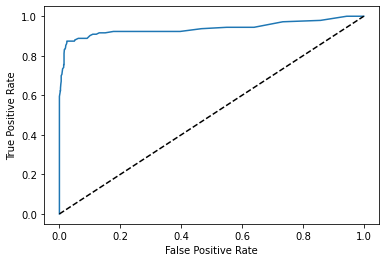

In [214]:
# Generate the probabilities
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Import roc_curve
from sklearn.metrics import roc_curve

# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()

In [215]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Print the AUC
print(roc_auc_score(y_test, y_pred_prob))

0.9387928291078816
